In [1]:
import json
with open("../docs/data/human_inter.json",'r') as in_file:
    json_in = json.load(in_file)

In [2]:
chr1 = []
chr2 = []
all_data = []
for i in json_in['interactions']:
    all_data.append(("chr_" + str(i['chr1']) + "_" + str(i['pos1']) , "chr_" + str(i['chr2']) + "_" + str(i['pos2'])))

In [3]:
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
G = nx.Graph(all_data)
data = json_graph.node_link_data(G)
H = json_graph.node_link_graph(data)

In [18]:
H.nodes['chr_1_5048']['viz'] = {'size':54}

In [19]:
H.nodes['chr_1_5048']

{'viz': {'size': 54}}

In [21]:
pos=nx.spring_layout(H)


In [22]:
from random import randint

for key,value in pos.items():
#     G.node(key) = dict(value)
    H.nodes[key]['viz'] = {'size': randint(0, 9)}
    H.nodes[key]['viz']['position'] = {'x' : value[0], 'y' : value[1]}
    H.nodes[key]['viz']['color'] = {'r' : 0, 'g' : 0, 'b' : 256}

In [23]:
# nx.set_node_attributes(H,pos,'pos')

In [24]:
# from pyvis import network as net
# J = net.Network(notebook=True,height='1000px',width='1000px')
# J.from_nx(H)
# J.force_atlas_2based()
# J.toggle_physics(True)
# J.show_buttons(filter_=[ 'physics'])
# J.show("mygraph.html")

In [25]:
n_ = H.nodes()

In [26]:
a = list(nx.node_connected_component(H,'chr_1_5048'))

In [27]:
b = list(dict(H.nodes()).keys())

In [28]:
c = [n for n in b if n not in a]

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


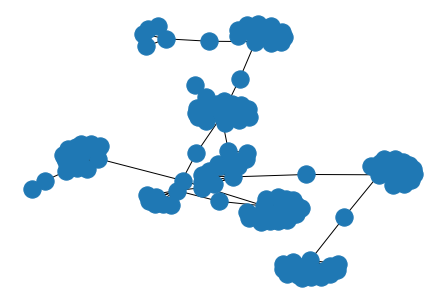

In [29]:
H.remove_nodes_from(c)
nx.draw(H)

In [30]:
# J = net.Network(notebook=True,height='1000px',width='1000px')
# J.from_nx(H)
# pos = J.force_atlas_2based()
# print(pos)
# nx.set_node_attributes(H,'pos',pos)
# J.toggle_physics(True)
# J.show_buttons(filter_=[ 'physics'])
# J.show("mygraph2.html")

In [31]:
data2 = json_graph.node_link_data(H, {'link': 'edges', 'source': 'from', 'target': 'to'})

In [32]:
# G.from_nx(H)
# G.toggle_physics(True)
# G.show_buttons(filter_=[ 'physics'])
# G.show("mygraph.html")

In [33]:
data2

{'directed': False,
 'edges': [{'from': 'chr_1_5048', 'to': 'chr_8_2548'},
  {'from': 'chr_1_5048', 'to': 'chr_11_766'},
  {'from': 'chr_1_5048', 'to': 'chr_5_718'},
  {'from': 'chr_1_5048', 'to': 'chr_5_438'},
  {'from': 'chr_1_5048', 'to': 'chr_19_140'},
  {'from': 'chr_1_5048', 'to': 'chr_13_1216'},
  {'from': 'chr_1_5048', 'to': 'chr_3_632'},
  {'from': 'chr_1_5048', 'to': 'chr_12_954'},
  {'from': 'chr_1_5048', 'to': 'chr_3_692'},
  {'from': 'chr_1_5048', 'to': 'chr_10_2051'},
  {'from': 'chr_1_5048', 'to': 'chr_14_1149'},
  {'from': 'chr_1_5048', 'to': 'chr_16_624'},
  {'from': 'chr_1_5048', 'to': 'chr_19_800'},
  {'from': 'chr_1_5048', 'to': 'chr_11_2406'},
  {'from': 'chr_1_5048', 'to': 'chr_4_3069'},
  {'from': 'chr_1_5048', 'to': 'chr_3_112'},
  {'from': 'chr_1_5048', 'to': 'chr_3_2992'},
  {'from': 'chr_1_5048', 'to': 'chr_3_1752'},
  {'from': 'chr_1_5048', 'to': 'chr_19_200'},
  {'from': 'chr_1_5048', 'to': 'chr_10_931'},
  {'from': 'chr_1_5048', 'to': 'chr_4_3829'},
  {'fr

In [34]:
nx.write_gexf(H, "test.gexf")

In [37]:
nx.write_gexf(H,"test.gexf")

In [36]:
linefeed = chr(10)
s = linefeed.join(nx.generate_gexf(H))
for line in nx.generate_gexf(G):
    print (line)

<gexf xmlns:viz="http://www.gexf.net/1.2draft/viz" version="1.2" xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.w3.org/2001/XMLSchema-instance">
  <graph defaultedgetype="undirected" mode="static" name="">
    <meta>
      <creator>NetworkX 2.3</creator>
      <lastmodified>17/06/2019</lastmodified>
    </meta>
    <nodes>
      <node id="chr_1_5048" label="chr_1_5048">
        <viz:size value="54" />
      </node>
      <node id="chr_8_2548" label="chr_8_2548" />
      <node id="chr_8_68" label="chr_8_68" />
      <node id="chr_15_1070" label="chr_15_1070" />
      <node id="chr_13_1856" label="chr_13_1856" />
      <node id="chr_14_40" label="chr_14_40" />
      <node id="chr_7_57" label="chr_7_57" />
      <node id="chr_13_816" label="chr_13_816" />
      <node id="chr_4_30" label="chr_4_30" />
      <node id="chr_12_1554" label="chr_12_1554" />
      <node id="chr_13_396" label="chr_13_396" />
      <node id